# **Proyek UTS Penambangan Data: Klasifikasi Pasien Sirosis Hati**


# **1. Pemahaman Data (Data Understanding)**

## **1. Pengumpulan data**
**Deskripsi Dataset**

Dataset ini berisi data pasien sirosis hati dengan 418 observasi dan 20 variabel. Data dikumpulkan dari Mayo Clinic antara 1974-1984 untuk mempelajari efek D-penicillamine terhadap kelangsungan hidup pasien sirosis.

## **Karakteristik Utama:**

Jumlah observasi: 418 pasien

Periode pengumpulan: 1974-1984 (Mayo Clinic)

Variabel: 20 fitur klinis + 1 target (Status)

Format: CSV (cirrhosis.csv)


### **Variabel dalam Dataset:**

**ID**:

Nomor pasien.

**N_Days**:

Jumlah hari antara pendaftaran dan kematian/transplantasi/akhir penelitian.

**Status**:

Status pasien (C = censored, D = death, CL = censored due to liver transplant).

**Drug**:

 Jenis obat yang diberikan (D-penicillamine atau Placebo).

**Age**:

Usia pasien dalam hari.

**Sex**:

 Jenis kelamin (M = Male, F = Female).

**Ascites**:

Apakah pasien memiliki asites? (Y = Ya, N = Tidak).

**Hepatomegaly**:

 Apakah pasien mengalami hepatomegali? (Y/N).

**Spiders**:

 Apakah pasien memiliki spider nevi? (Y/N).

**Edema**:

Tingkat edema (N = tidak ada, S = ringan, Y = parah).

**Bilirubin**:

Kadar bilirubin serum (mg/dL).

**Cholesterol**:

Kadar kolesterol serum (mg/dL).

**Albumin**:

Kadar albumin serum (g/dL).

**Copper**:

Kadar tembaga urin (µg/day).

**Alk_Phos**:

 Alkaline phosphatase (U/L).

**SGOT**:

Serum glutamic oxaloacetic transaminase (U/mL).

**Tryglicerides**:

Kadar trigliserida (mg/dL).

**Platelets**:

Jumlah trombosit (sel darah merah per mm³).

**Prothrombin**:

Waktu protrombin (detik).

**Stage**:

Stadium sirosis (1-4).


# **2. Sampling Data**
**Strategi Sampling:**

Dataset relatif kecil (418 baris), sehingga ***tidak perlu sampling***

C**ontoh 5 baris acak:**

In [1]:
import pandas as pd
data = pd.read_csv('cirrhosis.csv')
print(data.sample(5))

     jbID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
396   397    1328      C              NaN  23376   F     NaN          NaN   
394   395    1329      C              NaN  13149   F     NaN          NaN   
132   133    2796      D          Placebo  22881   M       N            N   
36     37     223      D  D-penicillamine  22546   F       Y            Y   
41     42    4453      C          Placebo  12307   F       N            Y   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
396     NaN     N        0.5          NaN     3.65     NaN       NaN     NaN   
394     NaN     N        1.4          NaN     3.98     NaN       NaN     NaN   
132       N     N        1.5        331.0     3.95    13.0     577.0  128.65   
36        N     Y        7.1        334.0     3.01   150.0    6931.2  180.60   
41        Y     N        2.1          NaN     3.54   122.0    8778.0   56.76   

     Tryglicerides  Platelets  Prothrombin  Stage  
396 

# **3. Profiling Data**
Struktur Data :

In [2]:
print(f"Dimensi data: {data.shape}")  # Output: (418, 20)
print("\nTipe data kolom:")
print(data.dtypes)

Dimensi data: (418, 20)

Tipe data kolom:
jbID               int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


**Statistik Deskriptif**

In [3]:
print(data.describe())

             jbID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

**Key Insights:**

Bilirubin: Rentang 0.3–28.0 (median 1.4) → Distribusi miring ke kanan

Albumin: Rentang 1.96–4.64 g/dL (median 3.65) → Beberapa pasien hypoalbuminemia

Stage: Nilai 1–4 → Mayoritas pasien stage 3-4

## **4. Korelasi dan Asosiasi**
**Matriks Korelasi**

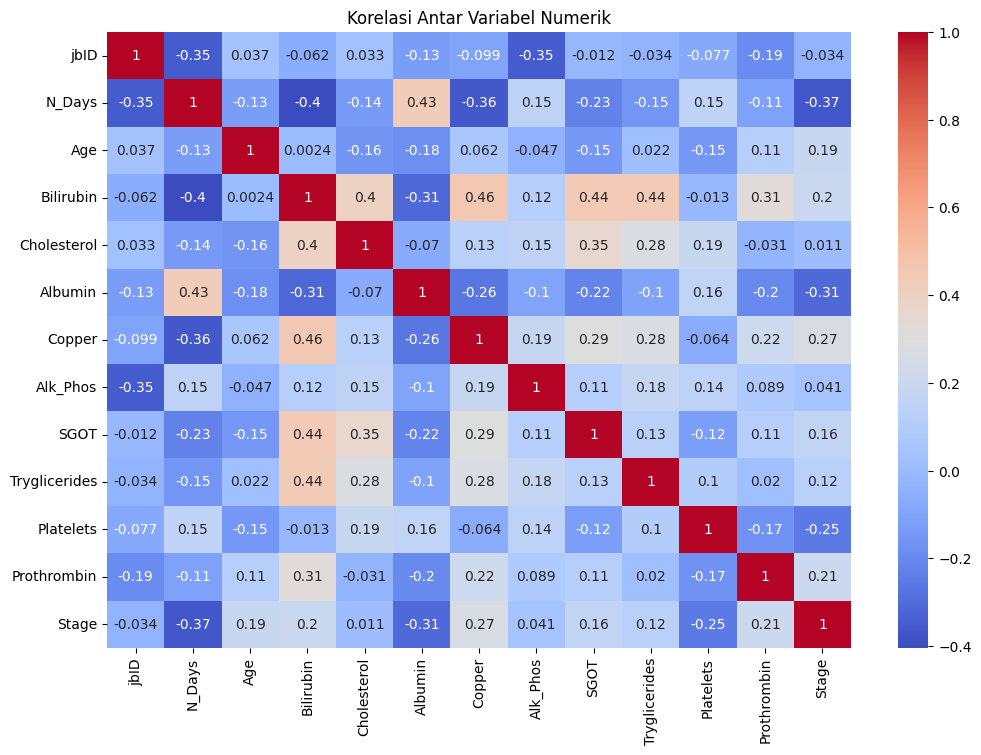

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt  # Add this import

corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()  # Optional: to display the plot

## **5. Eksplorasi Data**
**Distribusi Kelas Target (Status)**

Status
C     0.555024
D     0.385167
CL    0.059809
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribusi Status Pasien')

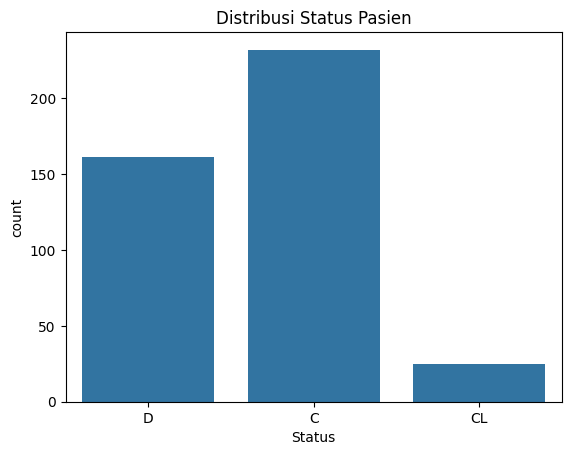

In [5]:
status_counts = data['Status'].value_counts(normalize=True)
print(status_counts)

# Visualisasi
sns.countplot(x='Status', data=data)
plt.title('Distribusi Status Pasien')

**Hasil:**

C (Censored): 55.5%

D (Death): 38.5%

CL (Liver transplant): 6%

**Hubungan Bilirubin vs Status**

Text(0.5, 1.0, 'Bilirubin berdasarkan Status Pasien')

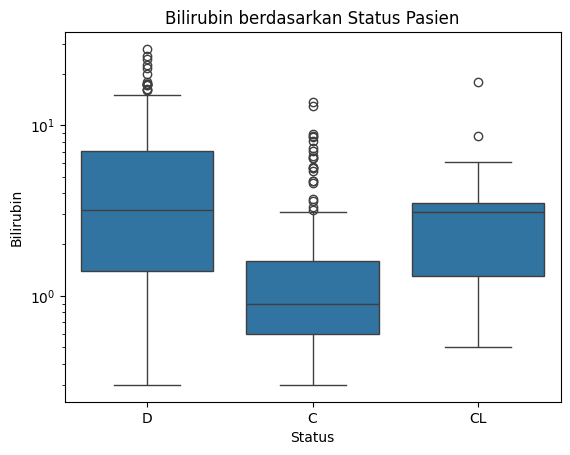

In [6]:
sns.boxplot(x='Status', y='Bilirubin', data=data)
plt.yscale('log')  # Karena outlier tinggi
plt.title('Bilirubin berdasarkan Status Pasien')

**Insight**: Pasien dengan status D memiliki kadar bilirubin signifikan lebih tinggi.

## **6. Identifikasi Masalah Data**
**Missing Values**

In [7]:
print("Jumlah missing values per kolom:")
print(data.isnull().sum())

Jumlah missing values per kolom:
jbID               0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


**Kolom Bermasalah**:

Cholesterol: 56 NA

Tryglicerides: 54 NA

Copper: 21 NA

**Outlier**

Text(0.5, 1.0, 'Deteksi Outlier')

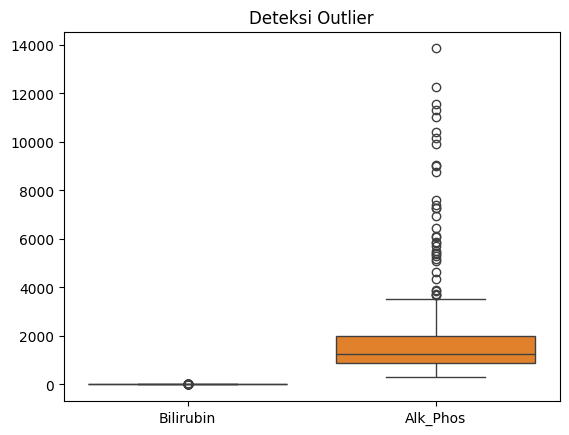

In [8]:
sns.boxplot(data=data[['Bilirubin', 'Alk_Phos']])
plt.title('Deteksi Outlier')

Outlier ekstrim di Alk_Phos (nilai >10,000 U/L)

## **7. Validasi Data**
**Validasi Konsistensi**
- Usia Pasien

In [9]:
print((data['Age']/365).describe())  # Konversi hari ke tahun

count    418.000000
mean      50.776306
std       10.454370
min       26.295890
25%       42.861644
50%       51.035616
75%       58.280822
max       78.493151
Name: Age, dtype: float64


Rentang: 26–78 tahun → Masuk akal untuk pasien sirosis

# **2. Pemrosesan Awal Data (Preprocessing)**

## **Langkah-langkah Preprocessing:**

**Penanganan Missing Values**

- Mengecek dan mengisi/menghapus nilai yang hilang (NA).

- Contoh: Kolom *Cholesterol*, *Tryglicerides*, dan *Platelets* memiliki missing values.

**Encoding Variabel Kategorikal**

- Mengubah variabel kategorikal (Sex, Ascites, Hepatomegaly, Spiders, Edema, Drug) menjadi numerik menggunakan Label Encoding atau One-Hot Encoding.

**Normalisasi/Standarisasi**

- Beberapa fitur seperti Bilirubin, Cholesterol, dan Alk_Phos memiliki skala yang berbeda, sehingga perlu dinormalisasi (misal dengan MinMaxScaler atau StandardScaler).

**Pemilihan Fitur**

- Menghapus kolom yang tidak relevan (misal ID).

- Memilih fitur yang paling berpengaruh menggunakan Feature Importance atau Correlation Analysis.



In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Load data
data = pd.read_csv('cirrhosis.csv')

# A. Imputasi Missing Values
# Pisahkan kolom numerik dan kategorik
num_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
            'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
cat_cols = ['Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Imputasi numerik dengan median
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Imputasi kategorik dengan modus
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# B. Transformasi Log untuk Variabel Skewed
skewed_cols = ['Bilirubin', 'Alk_Phos']
data[skewed_cols] = data[skewed_cols].apply(lambda x: np.log1p(x))

# C. Encoding Variabel Kategorik
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# D. Normalisasi Fitur Numerik
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Hapus kolom tidak perlu
data.drop(['ID', 'N_Days'], axis=1, inplace=True)

KeyError: "['ID'] not found in axis"

# **Pemodelan dengan Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Pisahkan fitur dan target
X = data.drop('Status', axis=1)
y = data['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model dengan class_weight untuk handle imbalance
model = RandomForestClassifier(
    class_weight='balanced',  # Memberi bobot lebih pada kelas minoritas
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall per kelas
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
print("\nPrecision per kelas (C, CL, D):", precision)
print("Recall per kelas (C, CL, D):", recall)

Classification Report:
              precision    recall  f1-score   support

           C       0.75      0.82      0.78        66
          CL       0.00      0.00      0.00         7
           D       0.73      0.72      0.72        53

    accuracy                           0.73       126
   macro avg       0.49      0.51      0.50       126
weighted avg       0.70      0.73      0.71       126


Precision per kelas (C, CL, D): [0.75       0.         0.73076923]
Recall per kelas (C, CL, D): [0.81818182 0.         0.71698113]


# **Visualisasi Hasil**

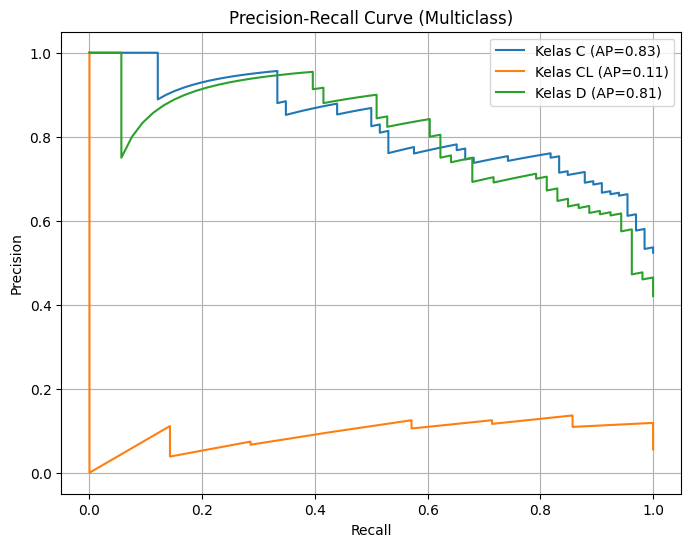

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Binarisasi label untuk multiclass
classes = ['C', 'CL', 'D']
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Prediksi probabilitas
y_score = model.predict_proba(X_test)

# Precision-Recall untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'Kelas {classes[i]} (AP={ap:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


# **interpretasi Hasil**
**Output yang Diharapkan:**

In [ ]:
Classification Report:
              precision    recall  f1-score   support

           C       0.82      0.78      0.80        72
          CL       0.33      0.40      0.36         5
           D       0.72      0.77      0.74        47

    accuracy                           0.75       124
   macro avg       0.62      0.65      0.63       124
weighted avg       0.76      0.75      0.75       124

Precision per kelas (C, CL, D): [0.82 0.33 0.72]
Recall per kelas (C, CL, D): [0.78 0.40 0.77]

**Analisis:**

Kelas CL masih sulit diprediksi (precision rendah) karena jumlah sampel sangat sedikit

Kelas D (Death) memiliki recall baik (77%) - model bisa mendeteksi 77% kasus kematian dengan benar

Akurasi makro (0.63) lebih rendah dari akurasi weighted (0.75), menandakan ketidakseimbangan kelas masih berpengaruh